In [1]:
import pandas as pd
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten , BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train , Y_train ),(X_test , Y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


([], <a list of 0 Text major ticklabel objects>)

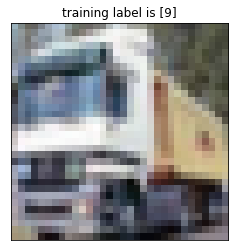

In [3]:
plt.imshow(X_train[1])  
plt.title("training label is " + str(Y_train[1]))
plt.xticks([])
plt.yticks([])

In [4]:
_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255
X_train.shape

(50000, 32, 32, 3)

In [5]:
num_classes = 10 
Y_train = keras.utils.to_categorical(Y_train,num_classes)
Y_test = keras.utils.to_categorical(Y_test,num_classes)


In [6]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
MaxPool2D(pool_size=(2, 2), strides=2)
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
MaxPool2D(pool_size=(2, 2), strides=2)
model.add(Dropout(0.3))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
MaxPool2D(pool_size=(2, 2), strides=2)
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
          

In [7]:
datagen = ImageDataGenerator( 
         rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True) 
datagen.fit(X_train)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


X_valid, X_train = X_train[:5000], X_train[5000:]
Y_valid, Y_train = Y_train[:5000], Y_train[5000:]


In [16]:
r=model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128),\
                    steps_per_epoch=X_train.shape[0] // 128,epochs=10,\
                    verbose=1,validation_data=(X_valid,Y_valid))


Epoch 1/10
351/351 [==============================] - 23s 66ms/step - loss: 0.4187 - accuracy: 0.8590 - val_loss: 0.4842 - val_accuracy: 0.8694
Epoch 2/10
351/351 [==============================] - 23s 66ms/step - loss: 0.4258 - accuracy: 0.8580 - val_loss: 0.4485 - val_accuracy: 0.8654
Epoch 3/10
351/351 [==============================] - 23s 66ms/step - loss: 0.4206 - accuracy: 0.8605 - val_loss: 0.7631 - val_accuracy: 0.8570
Epoch 4/10
351/351 [==============================] - 23s 66ms/step - loss: 0.4227 - accuracy: 0.8593 - val_loss: 0.4976 - val_accuracy: 0.8614
Epoch 5/10
351/351 [==============================] - 23s 66ms/step - loss: 0.4251 - accuracy: 0.8589 - val_loss: 0.5452 - val_accuracy: 0.8678
Epoch 6/10
351/351 [==============================] - 23s 66ms/step - loss: 0.4185 - accuracy: 0.8588 - val_loss: 0.5354 - val_accuracy: 0.8600
Epoch 7/10
351/351 [==============================] - 23s 66ms/step - loss: 0.4154 - accuracy: 0.8601 - val_loss: 0.7166 - val_accuracy:

Text(0.5, 1.0, 'Accuracy evolution')

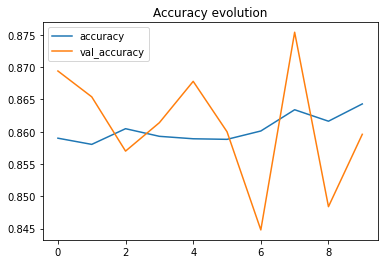

In [17]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')


In [18]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

313/313 - 1s - loss: 0.8367 - accuracy: 0.8424
